<a href="https://colab.research.google.com/github/james-lucius/qworld/blob/main/QB23_Q36_Superposition_and_Measurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://qworld.net" target="_blank" align="left"><img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/images/header.jpg" align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

_prepared by Abuzer Yakaryilmaz_

<font size="28px" style="font-size:28px;" align="left"><b> Superposition </b></font>
<br>
<br><br>
[<img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/images/watch_lecture.jpg" align="left">](https://youtu.be/uJZtxWHAlPI)
<br><br><br>

##### <font color="#08b806">Please execute the following cell, it is necessary to distinguish between your local environment and Google Colab's

In [1]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

SolutionToTask3 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1r9baG8GzInmlSkNWAqq7xbrjt300g-nJ?usp=sharing#scrollTo=LBptY1Lx_m1M' if in_colab() else 'QB23_Q36_Superposition_and_Measurement_Solutions.ipynb#task3')))
SolutionToTask4 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1r9baG8GzInmlSkNWAqq7xbrjt300g-nJ?usp=sharing#scrollTo=DnAV7iGg_m1O' if in_colab() else 'QB23_Q36_Superposition_and_Measurement_Solutions.ipynb#task4')))
SolutionToTask5 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1r9baG8GzInmlSkNWAqq7xbrjt300g-nJ?usp=sharing#scrollTo=cYxjsfg-_m1P' if in_colab() else 'QB23_Q36_Superposition_and_Measurement_Solutions.ipynb#task5')))

if in_colab():
    !pip install qiskit[visualization]==0.43.3
    !pip install qiskit-aer

##### There is no classical counterpart of the concept "superposition".

But, we can still use a classical analogy that might help us to give some intuitions.

<h3> Probability distribution </h3>

Suppose that Asja starts in $ \myvector{1\\0} $ and secretly applies the probabilistic operator $ \mymatrix{cc}{ 0.3 & 0.6 \\ 0.7 & 0.4 } $.

Because she applies her operator secretly, our information about her state is probabilistic, which is calculated as

$$
    \myvector{0.3 \\ 0.7} = \mymatrix{cc}{ 0.3 & 0.6 \\ 0.7 & 0.4 } \myvector{1\\0}.
$$

Asja is either in state 0 or in state 1.

However, from our point of view, Asja is in state 0 with probability $ 0.3 $ and in state 1 with probability $ 0.7 $.

We can say that Asja is in a probability distribution of states 0 and 1, being in both states at the same time but with different weights.

On the other hand, if we observe Asja's state, then our information about Asja becomes deterministic: either $ \myvector{1 \\ 0} $ or $ \myvector{0 \\ 1} $.

We can say that, after observing Asja's state, the probabilistic state $ \myvector{0.3 \\ 0.7}  $ collapses to either $ \myvector{1 \\ 0} $ or $ \myvector{0 \\ 1} $.

<h3> The third experiment </h3>

Remember the following experiment. We trace it step by step by matrix-vector multiplication.

<img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qbook101/images/ch2/photon/photon7.jpg" width="65%">

<b> The initial Step </b>

The photon is in state $ \ket{v_0} = \vzero $.

<b> The first step </b>

Hadamard is applied:

$ \ket{v_1} = \hadamard \vzero = \stateplus $.

At this point, the photon is in a <b>superposition</b> of state $ \ket{0} $ and state $ \ket{1} $, <u>being in both states with the amplitudes</u> $ \frac{1}{\sqrt{2}} $ and $ \frac{1}{\sqrt{2}} $, respectively.

The state of photon is $ \ket{v_1} = \stateplus $, and we can also represent it as follows:
$ \ket{v_1} =  \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1} $.

<b> The second step </b>

Hadamard is applied again:

We write the effect of Hadamard on states $ \ket{0} $ and $ \ket{1} $ as follows:

$ H \ket{0} = \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1} $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <i>(These are the transition amplitudes of the first column.)</i>

$ H \ket{1} = \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1} $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <i>(These are the transition amplitudes of the second column.)</i>

This representation helps us to see clearly why the state $ \ket{1} $ disappears.

Now, let's see the effect of Hadamard on the quantum state $ \ket{v_1} =  \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1} $:

$ \ket{v_2} = H \ket{v_1} = H \mybigpar{ \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1} } = \frac{1}{\sqrt{2}} H \ket{0} + \frac{1}{\sqrt{2}} H \ket{1} $

We can replace $ H\ket{0} $ and $ H\ket{1} $ as described above. $ \ket{v_2} $ is formed by the summation of the following terms:

$~~~~~~~~ \dsqrttwo H \ket{0} = $ <font color="green">$\donehalf \ket{0} $</font> <font color="red">$ + \donehalf \ket{1}  $</font>

$~~~~~~~~ \dsqrttwo H \ket{1} = $ <font color="green">$\donehalf \ket{0} $</font> <font color="red">$ - \donehalf \ket{1}  $</font>
<br>
<font size="+1">$ \mathbf{+}\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_ $</font>

$ ~~ $ <font color="green"> $\mypar{ \donehalf+\donehalf } \ket{0} $</font> +
<font color="red"> $\mypar{ \donehalf-\donehalf }  \ket{1} $ </font> $ = \mathbf{\ket{0}} $.

<font color="green">The amplitude of $ \ket{0} $ becomes 1,</font> <font color="red"> but the amplitude of $ \ket{1} $ becomes 0 because of cancellation.</font>

The photon was in both states at the same time with <u>certain amplitudes</u>.

After the second Hadamard, the "outcomes" are <u>interfered with each other</u>.

The interference can be constructive or destructive.

In our examples, <font color="green"><b>the outcome $ \ket{0} $s are interfered constructively</b></font>, but <font color="red"><b>the outcome $ \ket{1} $s are interfered destructively</b></font>.

<h3> Observations </h3>

<u>Probabilistic systems</u>: If there is a nonzero transition to a state, then it contributes to the probability of this state positively.

<u>Quantum systems</u>: If there is a nonzero transition to a state, then we cannot know its contribution without knowing the other transitions to this state.

If it is the only transition, then it contributes to the amplitude (and probability) of the state, and it does not matter whether the sign of the transition is positive or negative.

If there is more than one transition, then depending on the summation of all transitions, we can determine whether a specific transition contributes or not.

As a simple rule, if the final amplitude of the state and nonzero transition have the same sign, then it is a positive contribution; and, if they have the opposite signs, then it is a negative contribution.

<h3> Task 1 </h3>

[on paper]

Start in state $ \ket{u_0} =  \ket{1} $.

Apply Hadamard operator to $ \ket{u_0} $, i.e, find $ \ket{u_1} = H \ket{u_0} $.

Apply Hadamard operator to $\ket{u_1}$, i.e, find $ \ket{u_2} = H \ket{u_1} $.

Observe the constructive and destructive interferences, when calculating $ \ket{u_2} $.

<h3> Being in a superposition </h3>

A quantum system can be in more than one state with nonzero amplitudes.

Then, we say that our system is in a superposition of these states.

When evolving from a superposition, the resulting transitions may affect each other constructively and destructively.

This happens because of having opposite sign transition amplitudes.

Otherwise, all nonzero transitions are added up to each other as in probabilistic systems.

<hr>
<h2> Measurement </h2>

We can measure a quantum system, and then the system is observed in one of its states. This is the most basic type of measurement in quantum computing. (There are more generic measurement operators, but we will not mention about them.)

The probability of the system to be observed in a specified state is the square value of its amplitude.
<ul>
    <li> If the amplitude of a state is zero, then this state cannot be observed. </li>
    <li> If the amplitude of a state is nonzero, then this state can be observed. </li>
</ul>

For example, if the system is in quantum state

$$
    \myrvector{ -\frac{\sqrt{2}}{\sqrt{3}} \\ \frac{1}{\sqrt{3}} },
$$

then, after a measurement, we can observe the system in state $\ket{0} $ with probability $ \frac{2}{3} $ and in state $\ket{1}$ with probability $ \frac{1}{3} $.



<h4> Collapsing </h4>

After the measurement, the system collapses to the observed state, and so the system is no longer in a superposition. Thus, the information kept in a superposition is lost.
- In the above example, when the system is observed in state $\ket{0}$, then the new state becomes $ \myvector{1 \\ 0} $.
- If it is observed in state $\ket{1}$, then the new state becomes $ \myvector{0 \\ 1} $.

<h3> The second experiment of the quantum coin flipping </h3>

Remember the experiment set-up.

<img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qbook101/images/ch2/photon/photon5.jpg" width="65%">

In this experiment, after the first quantum coin-flipping, we make a measurement.

If the measurement outcome is state $ \ket{0} $, then we apply a second Hadamard.

First, we trace the experiment analytically.

<table width="100%"><tr>
<td width="400px" style="background-color:white;text-align:center;vertical-align:middle;" cellpadding=0>
    <img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qbook101/images/ch2/tracing-2nd-exp.png">
    <br><br>
    <font size="-2"><a href="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qbook101/images/ch2/tracing-2nd-exp.txt" target="_blank">the tex code of the image</a></font>
</td>
<td width="*" style="background-color:white;text-align:left;vertical-align:top;">
    <b> The first Hadamard </b>
    <br><br>
    We start in state $ \ket{0} = \vzero $. Then, we apply Hadamard operator:
    <br><br>
    $ \stateplus = \hadamard \vzero $ <hr>
    <!---------->
    <b> The first measurement </b>
    <br><br>
    Due to the photon detector A, the photon cannot be in superposition, and so it forces the photon to be observed in state $\ket{0}$ or state $ \ket{1} $. This is a measurement.
    <br><br>
    Since the amplitudes are $ \sqrttwo $, we observe each state with equal probability.
    <br><br>
    Thus, with probability $ \frac{1}{2} $, the new quantum state is $ \ket{0} = \vzero $.
    <br><br>
    And, with probability $ \frac{1}{2} $, the new quantum state is $ \ket{1} = \vone $. <hr>
    <!---------->
    <b> The second Hadamard </b>
    <br><br>
    If the photon is in state $ \ket{0} $, then another Hadamard operator is applied.
    <br><br>
    In other words, with probability $ \frac{1}{2} $, the computation continues and another Hadamard is applied:
    <br><br>
    $ \stateplus = \hadamard \vzero $ <hr>
    <b> The second measurement </b>
    <br><br>
    Due to photon detectors B1 and B2, we make another measurement.
    <br><br>
    Thus, we observe state $ \ket{0} $ with probability $ \frac{1}{4} $ and state $ \ket{1} $ with probability $ \frac{1}{4} $.
    <br><br>
    At the end, the state $ \ket{0} $ can be observed with probability $ \frac{1}{4} $, and the state $ \ket{1} $ can be observed with probability $ \frac{3}{4} $.
</td>
</tr></table>

<h3> Implementing the second experiment </h3>

By using the simulator, we can implement the second experiment.

For this purpose, qiskit provides a conditional operator based on the value of a classical register.

In the following example, the last operator (x-gate) on the quantum register will be executed if the value of the classical register is 1.

    q = QuantumRegister(1)
    c = ClassicalRegister(1)
    qc = QuantumCircuit(q,c)
    ...
    qc.measure(q,c)
    qc.x(q[0]).c_if(c,1)
    
In our experiment, we use such classical control after the first measurement.

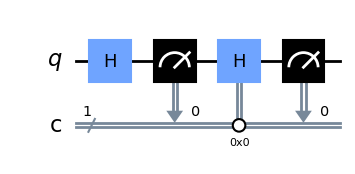

In [2]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# define a quantum register with a single qubit
q = QuantumRegister(1,"q")
# define a classical register with a single bit
c = ClassicalRegister(1,"c")
# define a quantum circuit
qc = QuantumCircuit(q,c)

# apply the first Hadamard
qc.h(q[0])

# the first measurement
qc.measure(q,c)

# apply the second Hadamard if the measurement outcome is 0
qc.h(q[0]).c_if(c,0)

# the second measurement
qc.measure(q[0],c)

# draw the circuit
display(qc.draw(output="mpl"))

<h3> Task 2 </h3>

If we execute this circuit 1000 times, what are the expected numbers of observing the outcomes '0' and '1'?

Test your result by executing the following code.

In [3]:
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)
print(counts)

{'1': 727, '0': 273}


<h3> Task 3 </h3>

Repeat the second experiment with the following modifications.

Start in state $ \ket{1} $.

Apply a Hadamard gate.

Make a measurement.

If the measurement outcome is 0, stop.

Otherwise, apply a second Hadamard, and then make a measurement.

Execute your circuit 1000 times.

Calculate the expected values of observing '0' and '1', and then compare your result with the simulator result.

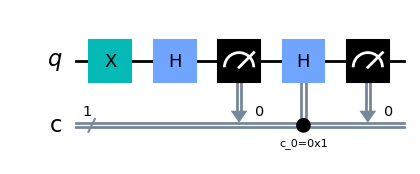

{'1': 266, '0': 734}


In [5]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumCircuit, execute, Aer

#
# your code is here
#
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.h(0)
qc.measure(0, 0)
qc.h(0).c_if(0, 1)
qc.measure(0, 0)
display(qc.draw(output = 'mpl'))

job = execute(qc, Aer.get_backend('qasm_simulator'), shots = 1000)
counts = job.result().get_counts(qc)
print(counts)

To check out our solution, run the next cell:

In [6]:
SolutionToTask3()  # show solution for task 3

<IPython.core.display.Javascript object>

<h3> Task 4 </h3>

Design the following quantum circuit.

Start in state $ \ket{0} $.

    Repeat 3 times:
        if the classical bit is 0:
            apply a Hadamard operator
        make a measurement

Execute your circuit 1000 times.

Calculate the expected values of observing '0' and '1', and then compare your result with the simulator result.

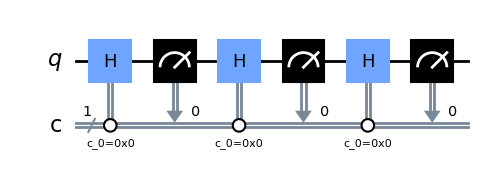

{'0': 125, '1': 875}


In [7]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumCircuit, execute, Aer

#
# your code is here
#
qc = QuantumCircuit(1, 1)
for i in range(3):
  qc.h(0).c_if(0, 0)
  qc.measure(0, 0)

display(qc.draw(output = 'mpl'))

job = execute(qc, Aer.get_backend('qasm_simulator'), shots = 1000)
counts = job.result().get_counts(qc)
print(counts)

To check out our solution, run the next cell:

In [ ]:
SolutionToTask4()  # show solution for task 4

---

<h3> Extra: Task 5 </h3>

Design the following randomly created quantum circuit.

Start in state $ \ket{0} $.

    apply a Hadamard operator
    make a measurement
    REPEAT 4 times:
        randomly pick x in {0,1}
        if the classical bit is x:
            apply a Hadamard operator
        make a measurement
        
Draw your circuit, and guess the expected frequency of observing '0' and '1' if the circuit is executed 10000 times.

Then, execute your circuit 10000 times, and compare your result with the simulator result.

Repeat execution a few more times.

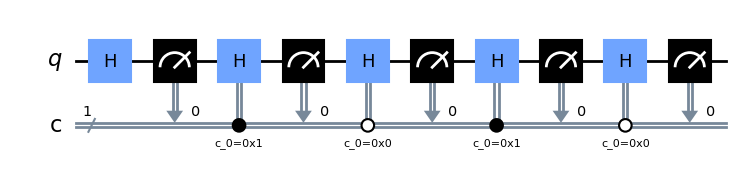

{'0': 3434, '1': 6566}


In [9]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumCircuit, execute, Aer
# import randrange for random choices
from random import randrange

#
# your code is here
#
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
for i in range(4):
  qc.h(0).c_if(0, randrange(2))
  qc.measure(0, 0)

display(qc.draw(output = 'mpl'))

job = execute(qc, Aer.get_backend('qasm_simulator'), shots = 10000)
counts = job.result().get_counts(qc)
print(counts)

To check out our solution, run the next cell:

In [ ]:
SolutionToTask5()  # show solution for task 5